# Exploratory analysis for year 2005
Exploratory data analysis for diplomatic relations for year 2005.

Run `diplomatic_exchanges.py` file first to create a db with data.

## Packages

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create a plots folder to store plots
import os
if not os.path.exists('./plots/'):
    os.mkdir('./plots')
if not os.path.exists('./plots/demo'):
    os.mkdir('./plots/demo')
    

## Analysis

In [3]:
# import our diplomatic_exchanges python script
import diplomatic_exchanges as de

In [4]:
# connect to database and load data for 2005 as a graph
conn = sqlite3.connect('./diplomatic.db')
G = de.get_diplomatic_graph(conn, 2005)

In [5]:
# check some basic network metrics
print('number of edges:', G.size())
print('number of nodes:', len(G.nodes()))
print('density:', nx.density(G))

number of edges: 7470
number of nodes: 192
density: 0.2036976439790576


In [6]:
# adjacency matrix
H = nx.adjacency_matrix(G)
H

<192x192 sparse matrix of type '<class 'numpy.intc'>'
	with 7470 stored elements in Compressed Sparse Row format>

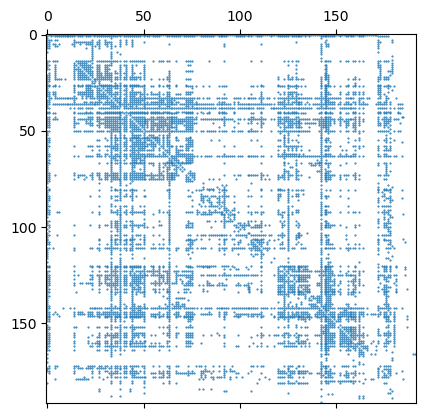

In [7]:
# plot adjacency matrix
fig, ax = plt.subplots(1,1, figsize=(6.4, 4.8))
ax.spy(H, markersize =1, marker = '.')
fig.savefig('./plots/demo/adj_matr_2005.png', dpi=300)

We see that the network is quite sparse

In [8]:
# load centrality measures for year 2005
df_centralities = de.get_centrality_measures(year=2005)
df_centralities

,index,pagerank,katz,eigenvector,betweenness,closeness,degree,in_degree,out_degreee,node_id,year
0,24,1.000000,0.966833,0.348819,5.160641e-13,1.0,1.000000,0.948718,1.000000,2,2005
1,48,0.521256,0.804169,0.466178,7.604882e-13,1.0,0.741379,0.621795,0.701754,20,2005
2,73,0.014564,0.033838,0.551500,9.068511e-37,1.0,0.022989,0.025641,0.017544,31,2005
3,104,0.046998,0.124208,0.761892,3.889137e-37,1.0,0.097701,0.070513,0.087719,41,2005
4,147,0.136362,0.229516,0.595980,5.983210e-08,1.0,0.183908,0.185897,0.157895,42,2005
...,...,...,...,...,...,...,...,...,...,...,...
187,1659,0.011548,0.020768,0.524989,3.081700e-37,1.0,0.017241,0.025641,0.011696,760,2005
188,1661,0.000000,0.000000,0.507905,6.907716e-25,1.0,0.022989,0.000000,0.029240,935,2005
189,1663,0.000000,0.000000,0.507905,3.282009e-29,1.0,0.011494,0.000000,0.017544,946,2005
190,1665,0.000000,0.000000,0.507905,0.000000e+00,1.0,0.000000,0.006410,0.000000,947,2005


Text(0.5, 1.0, 'Correlation coefficients, year 2005')

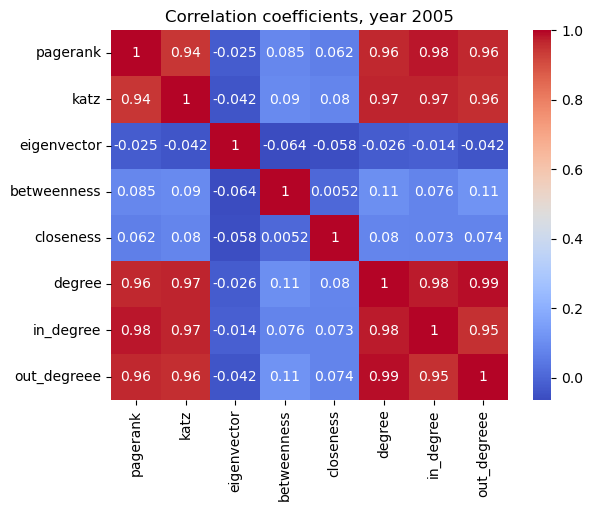

In [9]:
# check for correlation between measures
correlations = df_centralities.drop(['index', 'node_id', 'year'], axis=1).corr()
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.title("Correlation coefficients, year 2005")

We see that the measures are generally highly correlated with each other

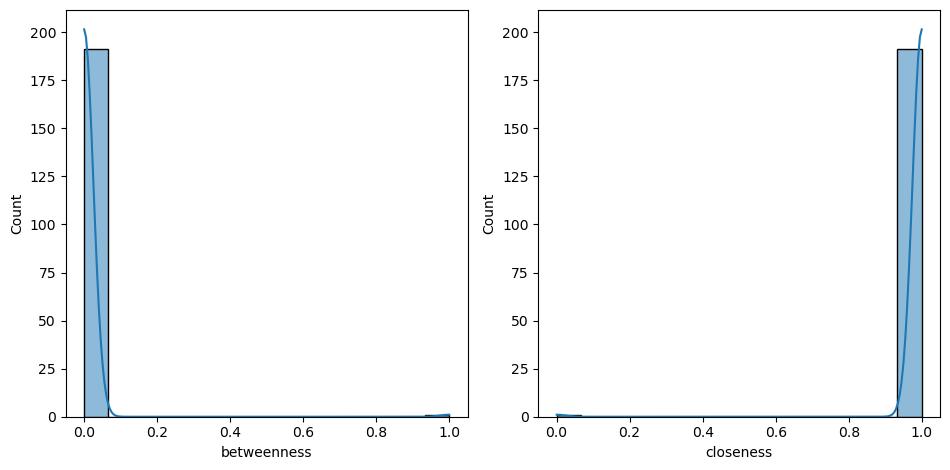

In [44]:
# check betweeness and closeness
# visualize differences
fig, axs = plt.subplots(1,2, figsize=(1.5*6.4, 4.8), tight_layout=True)

for name, ax in zip(['betweenness', 'closeness'], axs.flatten()):
    sns.histplot(df_centralities[name], bins=15, kde=True, ax=ax)

We can see that betweeness and closeness do not produce sensible ranking and thus exclude them from our analysis

In [32]:
# centrality measures to examine
measures = ['pagerank', 'degree', 'eigenvector', 'katz', 'in_degree', 'out_degreee']

In [10]:
# load country and country codes mappings
from diplomatic_exchanges import CODES_TO_COUNTRIES_DICT, COUNTRIES_TO_CODES_DICT
# abbreviations for better visualization
CODES_TO_COUNTRIES_DICT[2]= "USA"
CODES_TO_COUNTRIES_DICT[200] = "UK"
CODES_TO_COUNTRIES_DICT[490] = "Congo"
CODES_TO_COUNTRIES_DICT[696] = 'Arab Emirates'

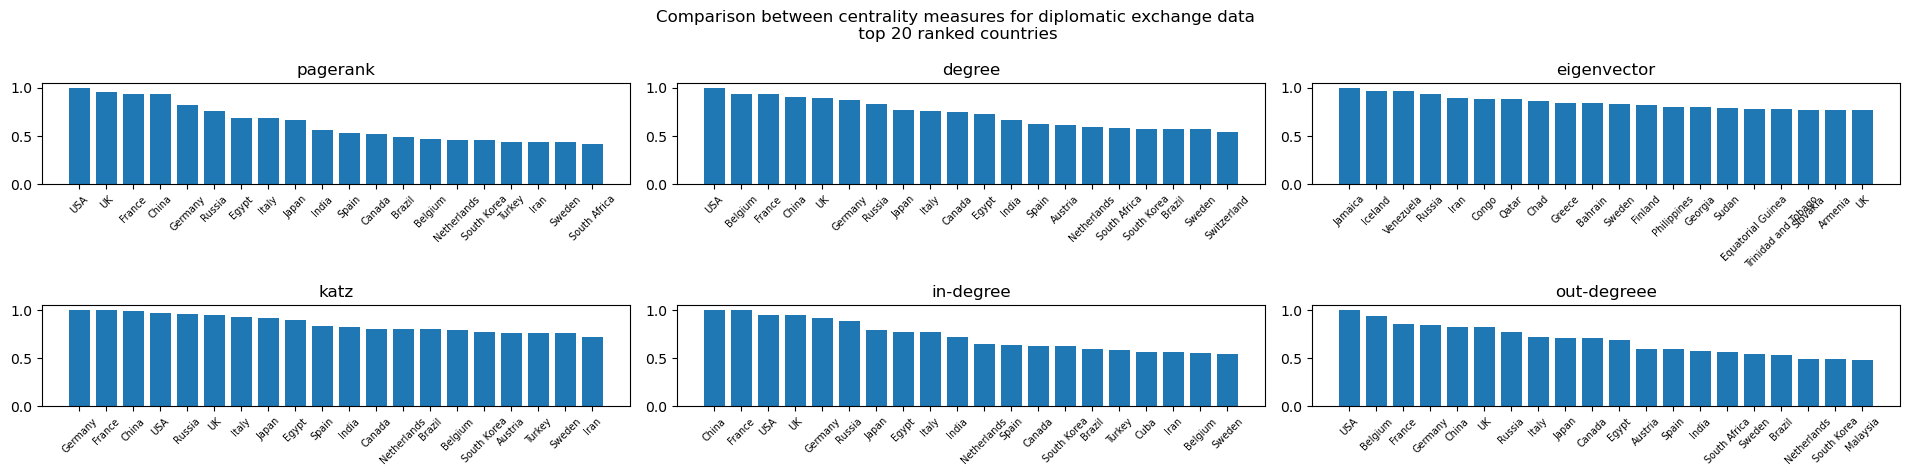

In [33]:
# plot centrality measures for top 20 rankings according to each measure
fig, axs = plt.subplots(2,3, figsize=(3*6.4,4.8), tight_layout=True)

# number of countries to check
limit = 20
for ax, column in zip(axs.flatten(), measures):
    sorted_measures = df_centralities.sort_values(column, ascending=False)
    sorted_measure = sorted_measures[column].values[:limit]
    country_codes = sorted_measures['node_id'].values[:limit]
    country_names = list(map(lambda x: CODES_TO_COUNTRIES_DICT[x], country_codes))
    ax.bar(country_names, sorted_measure)
    ax.set_xticklabels(country_names, rotation=45, fontsize=7);
    ax.set_title(column.replace('_','-'))
fig.suptitle(f"Comparison between centrality measures for diplomatic exchange data\n top {limit} ranked countries")
fig.savefig(f'./plots/demo/2005_comparison_between_measures_top_{limit}.png', dpi=300)

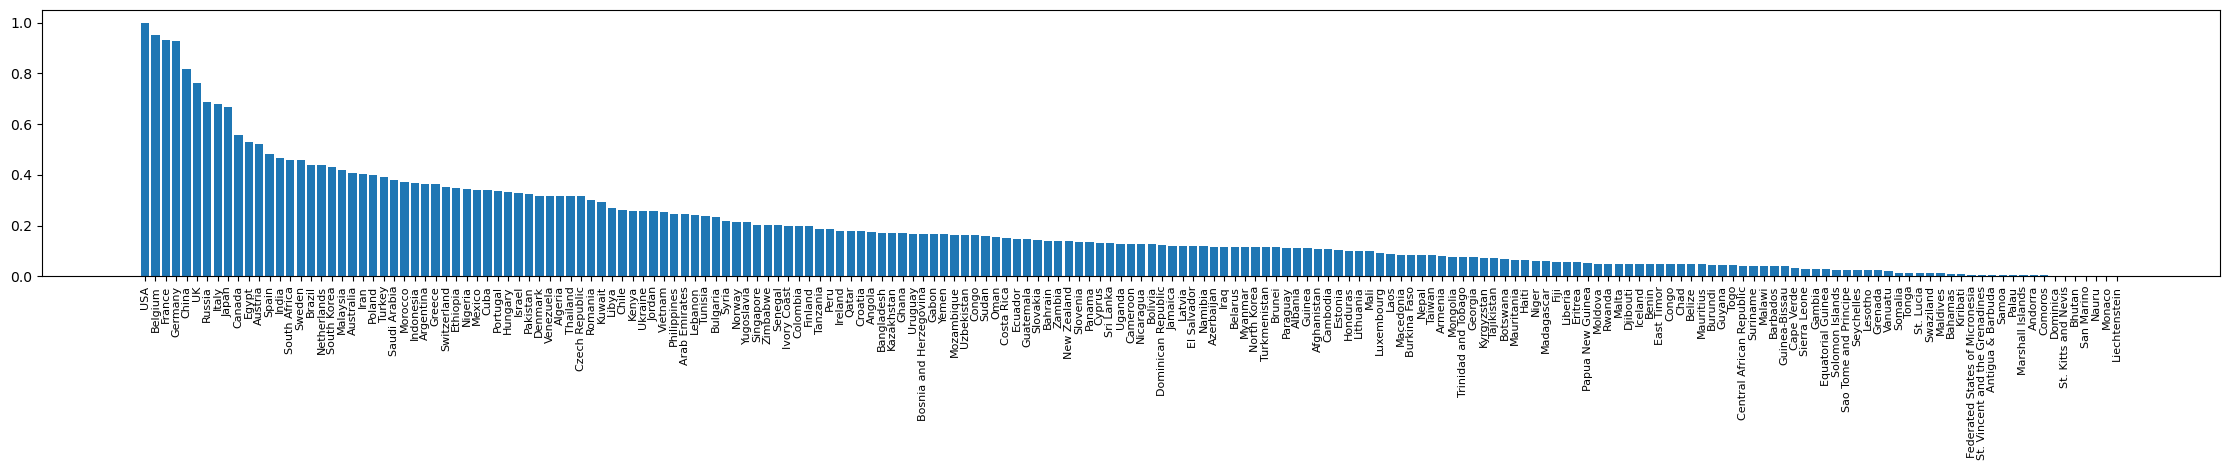

In [34]:
# Pagerank ranking for all countries
fig, ax = plt.subplots(1,1, figsize=(3.5*6.4, 4.8), tight_layout=True)


ax.bar(list(map(lambda x: CODES_TO_COUNTRIES_DICT[x], df_centralities.sort_values('pagerank', ascending=False)['node_id'])), df_centralities.sort_values('pagerank', ascending=False)['pagerank'])
ax.set_xticklabels(list(map(lambda x: CODES_TO_COUNTRIES_DICT[x], df_centralities.sort_values(column, ascending=False)['node_id'])),rotation=90, fontsize=7);
ax.tick_params(axis='x', which='major', labelsize=8)
fig.savefig('./plots/demo/2005_pagerank_weighted.png', dpi=300)

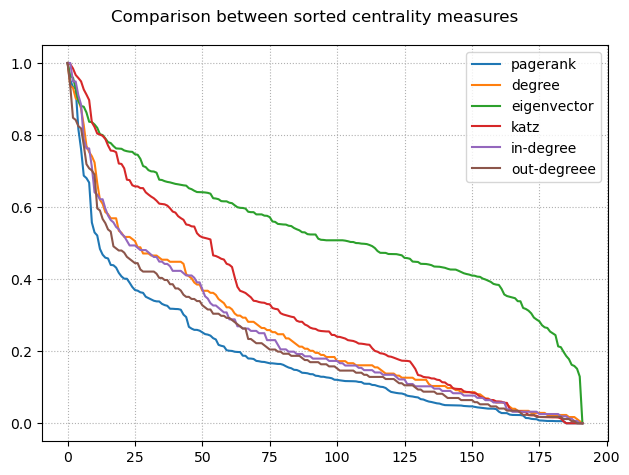

In [51]:
# comparison between sorted measures
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for column in measures:
    sorted_measures = df_centralities.sort_values(column, ascending=False)
    sorted_measure = sorted_measures[column].values
    country_codes = sorted_measures['node_id'].values
    country_names = list(map(lambda x: CODES_TO_COUNTRIES_DICT[x], country_codes))
    ax.plot(sorted_measure, label=column.replace('_','-'))
ax.legend()
ax.grid(ls=':')
fig.suptitle("Comparison between sorted centrality measures");

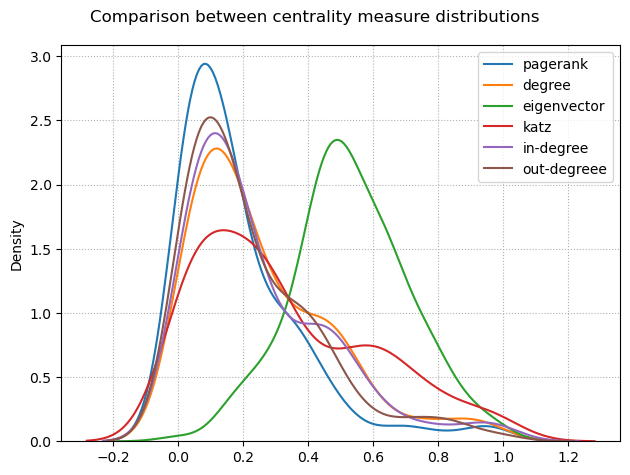

In [52]:
# comparison between measure distributions
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for column in measures:
    sorted_measures = df_centralities.sort_values(column, ascending=False)
    sorted_measure = sorted_measures[column].values
    # country_codes = sorted_measures['node_id'].values
    # country_names = list(map(lambda x: CODES_TO_COUNTRIES_DICT[x], country_codes))
    # ax.plot(sorted_measure, label=column.replace('_','-'))
    sns.kdeplot(sorted_measure, label=column.replace('_','-'))
ax.legend()
ax.grid(ls=':')
fig.suptitle("Comparison between centrality measure distributions");
fig.savefig(f'./plots/demo/2005_comparison_between_measure_distributions_one_plot.png', dpi=300)

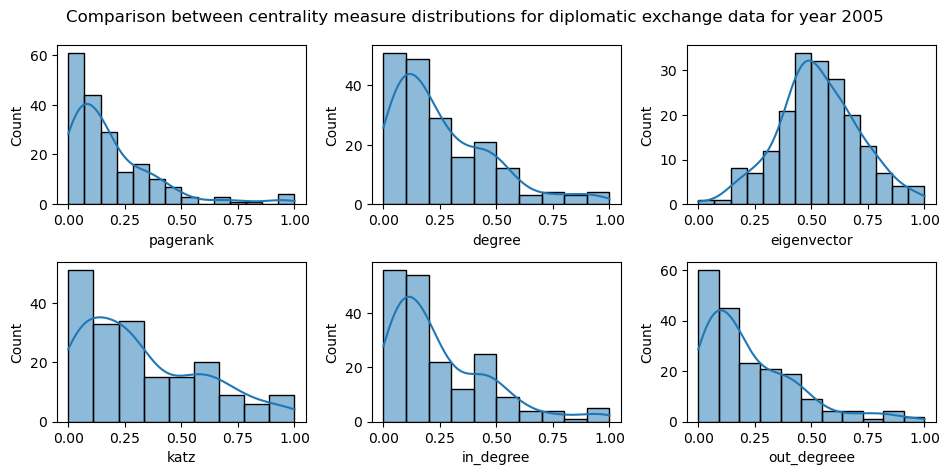

In [53]:
# distributions of centraltiy measures
fig, axs = plt.subplots(2,3, figsize=(1.5*6.4,4.8), tight_layout=True)
limit = 20
# count = 1
for ax, column in zip(axs.flatten(), measures):
    if column=='betweenness':
        sns.histplot(df_centralities[column], ax=ax, kde = True, bins=15)
    else:
        sns.histplot(df_centralities[column], ax=ax, kde = True)
fig.suptitle(f"Comparison between centrality measure distributions for diplomatic exchange data for year 2005")
fig.savefig(f'./plots/demo/2005_comparison_between_measure_distributions.png', dpi=300)

## Network visualizations

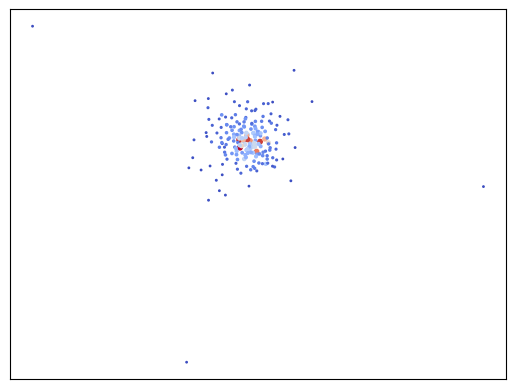

In [30]:
# a first attempt to visualize the network
fig, ax = plt.subplots(1,1, figsize=(6.4, 4.8))

layout = nx.spring_layout(G,iterations=15, seed=42)
column = 'pagerank'

nx.draw_networkx_nodes(G, pos=layout, node_size = 10*df_centralities['pagerank'].values +1,
node_color = df_centralities['pagerank'].values+1, cmap='coolwarm', ax=ax)
fig.savefig('./plots/demo/graph_pagerank_2005.png', dpi = 300)

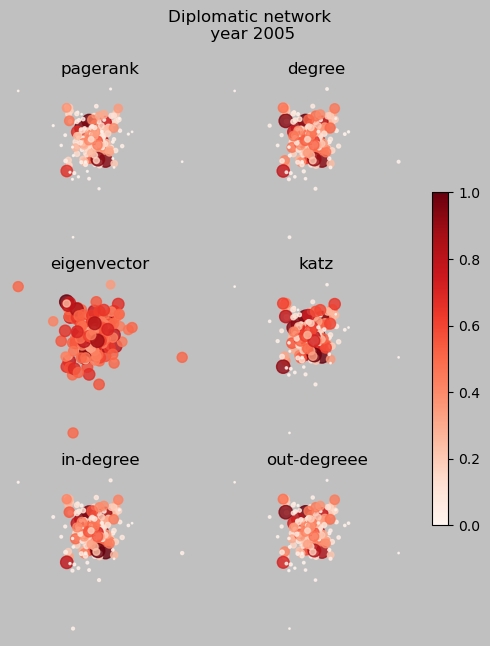

In [40]:
# Comparison between measures in network visualization
fig, axs = plt.subplots(3,2, figsize=( 6.4,1.5* 4.8))#,dpi = 300)

fig.patch.set_facecolor('silver')

# layout = nx.random_layout(G, seed=42)
layout = nx.spring_layout(G, iterations=5, seed=42)
for ax, column in zip(axs.flatten(), measures):
    nx.draw_networkx_nodes(G, pos=layout, node_size = 100*df_centralities[column].values +1,
                           node_color = df_centralities[column].values+1, cmap=plt.cm.Reds, ax=ax, alpha=0.8)
    ax.set_title(column.replace('_','-'))
    ax.axis('off')
    
    
# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=df_centralities[measures].min().min(),
                                                               vmax=df_centralities[measures].max().max()))
sm._A = []
cbar = fig.colorbar(sm, ax=axs, shrink=0.6)
fig.suptitle("Diplomatic network\n year 2005")
fig.savefig("./plots/demo/centrality_comparison_2005_graphs.png", dpi=300)

### Top 4 nodes
Connections of the top 4 nocdes according to pagerank with the rest of the nodes

In [18]:
# check the top 4 nodes connections with the rest of the nodes
top_4_nodes =  df_centralities.sort_values('pagerank',ascending=False)['node_id'].values[:4]
top_4_graph = nx.DiGraph() 

# add the edges between the subset nodes and the rest of the nodes
for node in G.nodes():
    if node in top_4_nodes:
        for neighbor in G.neighbors(node):
            top_4_graph.add_edge(node, neighbor, )
            
# the filtered graph containing only the connections to the top 4 nodes
filtered_G = nx.DiGraph()

# add the nodes from the full graph to the filtered graph
for node in G.nodes():
    filtered_G.add_node(node, label=CODES_TO_COUNTRIES_DICT[node])

# add the edges from the subset_edges to the filtered graph
for edge in top_4_graph.edges:
    filtered_G.add_edge(*edge)

## President visits visualization for 2005

In [19]:
from pyvis.network import Network

In [20]:
# run query to get data for regression analysis from database
conn = sqlite3.connect('diplomatic.db')
data = de.get_data_for_regression(conn, 2005)

In [21]:
# use a binary variable signifying whether the US president visited each country or not
# 1: the president visited
# 0: the president did NOT visit
data['president_visit_binary'] = data['destination country'].map(lambda x: 0 if x is None else 1)

In [22]:
# top 4 nodes network visualization with pyvis and presidential visits

net = Network(height='700px', select_menu=True, width='100%', bgcolor='#222222', font_color='white')

presidential_visit_nodes = data[data.president_visit_binary == 1].node_id.values

graph_for_viz = filtered_G
net.from_nx(graph_for_viz)

for node in graph_for_viz.nodes:
    if node in top_4_nodes:
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color="#f21f1f")
    elif node in presidential_visit_nodes:
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color="#8e199c")
    else:
        net.add_node(str(node), label=str(CODES_TO_COUNTRIES_DICT[node]), color='#1a7599')
for edge in graph_for_viz.edges():
    net.add_edge(str(edge[0]), str(edge[1]))    
    
net.show_buttons(filter_=['physics', 'nodes'])
net.show("top_4_pagerank_nodes_graph_2005_showing_presidential_visits.html")

# Gephi dumps

In [23]:
# complete 2005 network Gephi dump
G_with_info = nx.DiGraph()

for node in G.nodes:
    G_with_info.add_node(node, label=CODES_TO_COUNTRIES_DICT[node])
for edge in G.edges:
    G_with_info.add_edge(*edge)

nx.write_gexf(G_with_info, "complete_network_2005.gexf")

In [24]:
# top 4 pagerank nodes 2005 network Gephi dump
G_with_info = nx.DiGraph()

for node in filtered_G.nodes:
    G_with_info.add_node(node, label=CODES_TO_COUNTRIES_DICT[node])
for edge in G.edges:
    G_with_info.add_edge(*edge)

nx.write_gexf(G_with_info, "top4pagerank_network_2005.gexf")